In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
acceso_internet_1 = pd.read_csv('acceso_internet_1.csv')
acceso_internet_2 = pd.read_csv('acceso_internet_2.csv')


In [4]:
acceso_internet_1.drop(columns= ['Total_x', 'Total_y'], axis=1 ,inplace=True)

# Evolución de la cantidad de accesos por cada 100 hogares a lo largo del tiempo a nivel nacional.

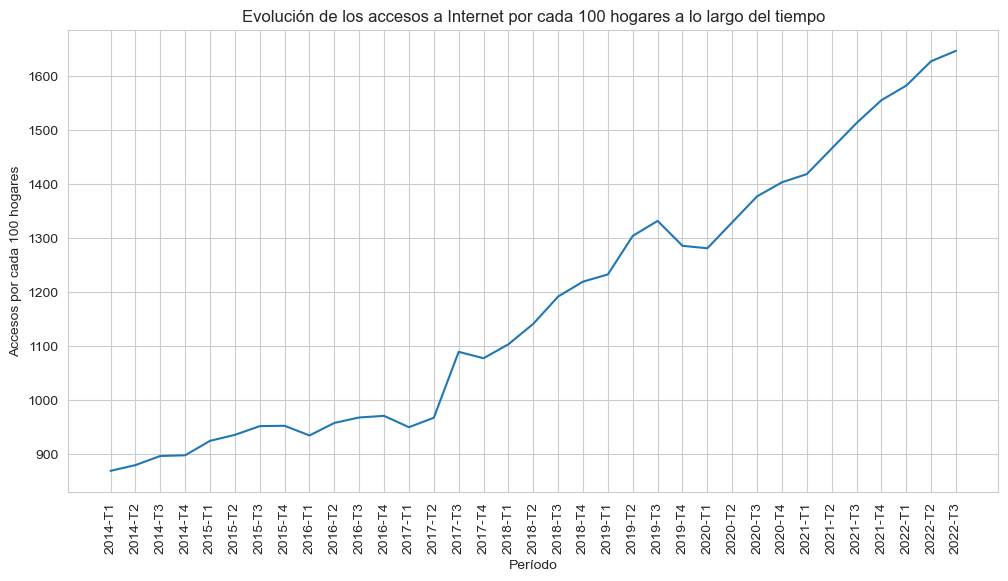

In [15]:
# Agrupar los datos por año y trimestre y calcular la suma de los accesos por cada 100 hogares
accesos_por_periodo = acceso_internet_1.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].sum().reset_index()

# Crear una nueva columna para combinar el año y el trimestre en el formato adecuado
accesos_por_periodo['Período'] = accesos_por_periodo['Año'].astype(str) + '-T' + accesos_por_periodo['Trimestre'].astype(str)

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=accesos_por_periodo, x='Período', y='Accesos por cada 100 hogares')
plt.xlabel('Período')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución de los accesos a Internet por cada 100 hogares a lo largo del tiempo')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [5]:
# Filtrar los datos para el período deseado
periodo_seleccionado = acceso_internet_1[(acceso_internet_1['Año'] == 2014) & (acceso_internet_1['Trimestre'] == 1) |
                                         (acceso_internet_1['Año'] == 2022) & (acceso_internet_1['Trimestre'] == 3)]

# Calcular la suma de los accesos por cada 100 hogares para el primer trimestre de 2014
accesos_primer_trimestre_2014 = periodo_seleccionado.loc[(periodo_seleccionado['Año'] == 2014) & (periodo_seleccionado['Trimestre'] == 1), 'Accesos por cada 100 hogares'].sum()

# Calcular la suma de los accesos por cada 100 hogares para el tercer trimestre de 2022
accesos_tercer_trimestre_2022 = periodo_seleccionado.loc[(periodo_seleccionado['Año'] == 2022) & (periodo_seleccionado['Trimestre'] == 3), 'Accesos por cada 100 hogares'].sum()

# Calcular la evolución en porcentaje
evolucion_porcentaje = (accesos_tercer_trimestre_2022 - accesos_primer_trimestre_2014) / accesos_primer_trimestre_2014 * 100

# Imprimir el resultado
print(f"La evolución en porcentaje de los accesos a Internet por cada 100 hogares desde el primer trimestre del 2014 al tercer trimestre del 2022 fue de: {evolucion_porcentaje:.2f}%")

La evolución en porcentaje de los accesos a Internet por cada 100 hogares desde el primer trimestre del 2014 al tercer trimestre del 2022 fue de: 89.47%


Es interesante observar que el gráfico de líneas muestra una tendencia alcista en la cantidad de accesos a Internet por cada 100 hogares a lo largo del tiempo. Esto indica que, en general, ha habido un crecimiento del 89.47% en la disponibilidad de acceso a Internet en Argentina. Es un indicio positivo de que se ha logrado expandir el acceso a Internet y brindar servicios de comunicación a una mayor cantidad de hogares.
Sin embargo, es importante considerar que este análisis se basa en la cantidad de accesos por cada 100 hogares, por lo que no proporciona información sobre la calidad o la velocidad de las conexiones. 

# Accesos y velocidades en Argentina
### ¿Cuántos son y cúan rápido se navega en las provincias de nuestro país?

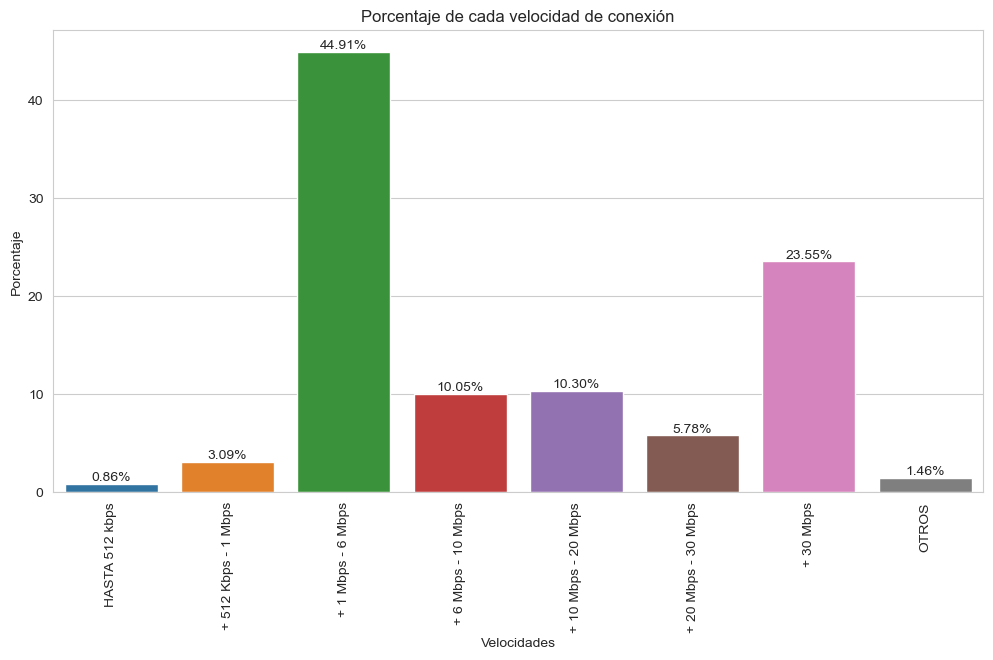

In [31]:
# Calcular el total de cada columna
columnas_velocidades = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                        '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']
total_por_columna = acceso_internet_1[columnas_velocidades].sum()

# Calcular los porcentajes
porcentajes = (total_por_columna / total_por_columna.sum()) * 100

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=porcentajes.index, y=porcentajes.values)
plt.xlabel('Velocidades')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de cada velocidad de conexión')
plt.xticks(rotation=90)


# Agregar los valores en porcentaje dentro del gráfico
for i, v in enumerate(porcentajes):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

#### podemos concluir que la mayoría de las conexiones de banda ancha fija en Argentina se encuentran en el rango de velocidad de '+ 1 Mbps - 6 Mbps' con el 44.91% del total, seguidas de las velocidades de '+ 30 Mbps' aunque todavía existe una proporción significativa de conexiones con porcentajes más bajas.

# Distribución de los accesos a internet por provincia (Accesos por cada 100 hogares)

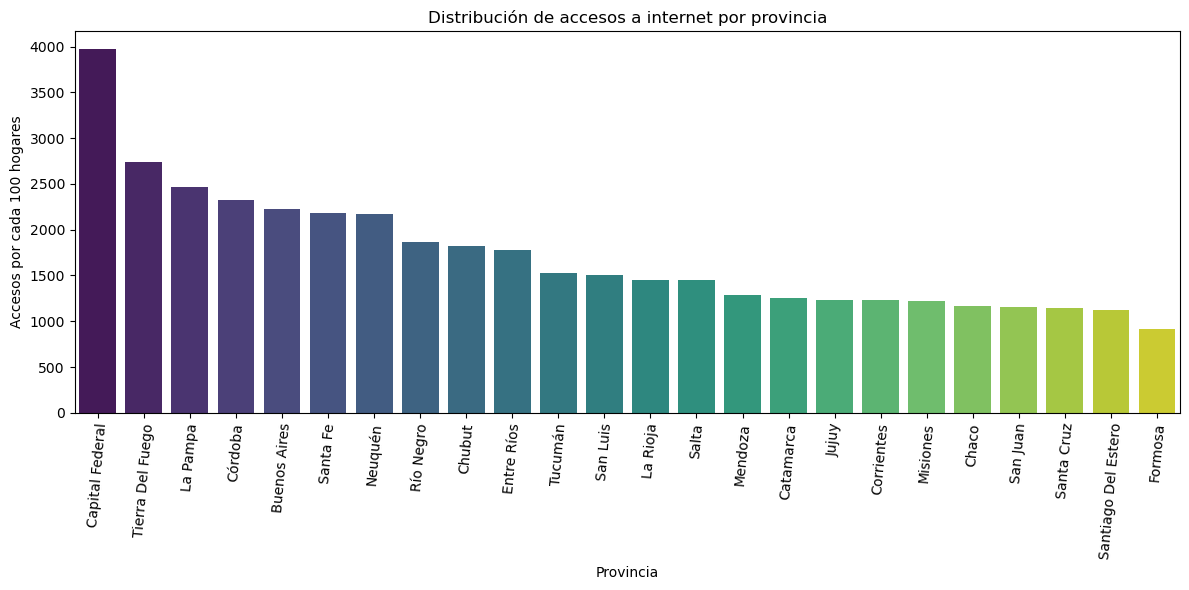

In [7]:
# Ordenar las provincias por la cantidad de accesos
accesos_por_provincia = acceso_internet_1.groupby('Provincia')['Accesos por cada 100 hogares'].sum().sort_values(ascending=False)

# Crear el gráfico con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=accesos_por_provincia.index, y=accesos_por_provincia.values, palette="viridis")
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de accesos a internet por provincia')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()




Como podemos observar, en el extremo izquierdo del gráfico, se encuentra "Capital Federal" con la mayor cantidad de accesos a internet por cada 100 hogares. Esto indica que es la provincia con la mayor proporción de hogares que tienen acceso a internet en comparación con las demás provincias.
Por otro lado, en el extremo derecho del gráfico, encontramos "Formosa" con la menor cantidad de accesos a internet por cada 100 hogares. Esto sugiere que Formosa tiene una proporción más baja de hogares con acceso a internet en comparación con otras provincias.
Estas observaciones resaltan la disparidad existente en la distribución de accesos a internet en las distintas provincias de Argentina. Capital Federal, como el centro urbano principal del país, tiene una mayor infraestructura y acceso a servicios de telecomunicaciones en comparación con provincias menos desarrolladas o áreas rurales, como Formosa.
Esto indica que existe una posible brecha digital entre las provincias más desarrolladas y las menos desarrolladas en términos de acceso a internet. Identificar estas disparidades es importante para tomar medidas y mejorar la conectividad en áreas con menor acceso.
Es importante tener en cuenta que esta visualización muestra la distribución relativa de accesos a internet por provincia, no el número absoluto de accesos. Por lo tanto, la comparación entre provincias debe considerarse en función de la proporción de accesos a internet por cada 100 hogares en lugar de los números exactos.
Para abordar estas diferencias y mejorar el servicio, sería bueno realizar una expansión de insfraestrucura, alianzas estratégicas con proveedores locales en las provincias que tienen menos accesos.

# Velocidad de internet predominante en Formosa y Capital Federal

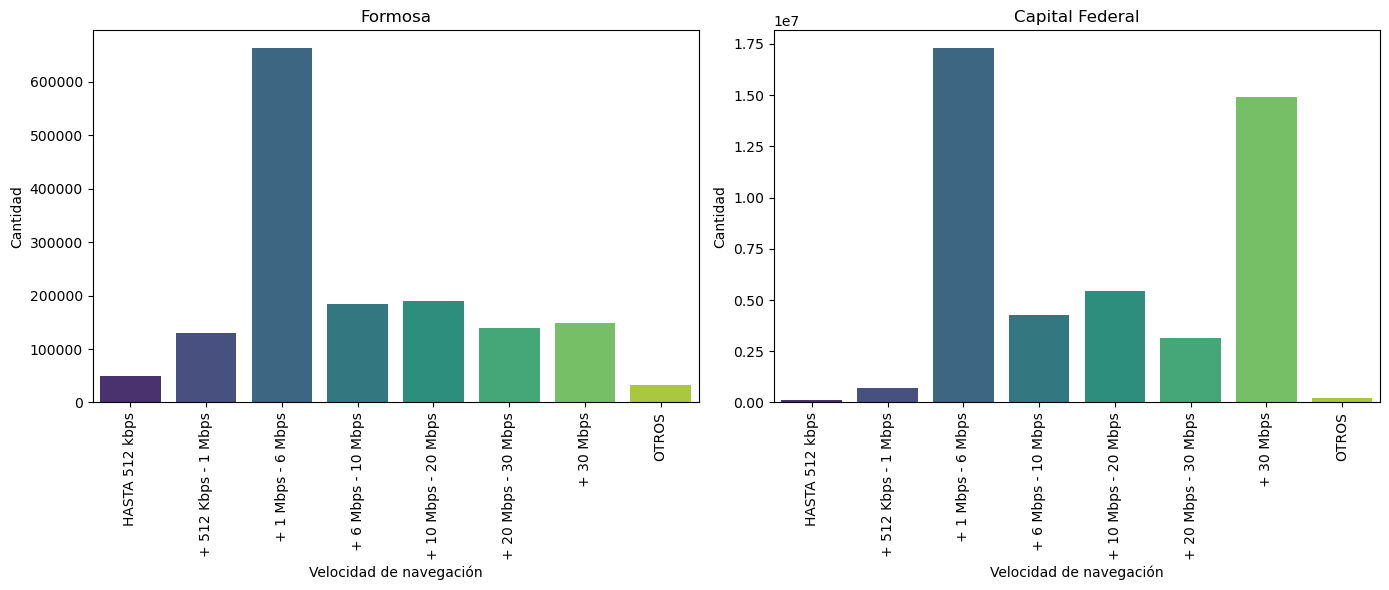

In [8]:
# Seleccionar las columnas relevantes para las velocidades de navegación
columnas_velocidades = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',
                        '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

# Filtrar los datos para la provincia de Formosa
datos_formosa = acceso_internet_1[acceso_internet_1['Provincia'] == 'Formosa']
cantidad_por_velocidad_formosa = datos_formosa[columnas_velocidades].sum()

# Filtrar los datos para la provincia de Capital Federal
datos_capital = acceso_internet_1[acceso_internet_1['Provincia'] == 'Capital Federal']
cantidad_por_velocidad_capital = datos_capital[columnas_velocidades].sum()

# Crear la figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para Formosa
sns.barplot(x=cantidad_por_velocidad_formosa.index, y=cantidad_por_velocidad_formosa.values, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Velocidad de navegación')
axs[0].set_ylabel('Cantidad')
axs[0].set_title('Formosa')
axs[0].tick_params(axis='x', rotation=90) 

# Gráfico para Capital Federal
sns.barplot(x=cantidad_por_velocidad_capital.index, y=cantidad_por_velocidad_capital.values, palette='viridis', ax=axs[1])
axs[1].set_xlabel('Velocidad de navegación')
axs[1].set_ylabel('Cantidad')
axs[1].set_title('Capital Federal')
axs[1].tick_params(axis='x', rotation=90) 

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Esta diferencia en el panorama de velocidades de navegación entre Formosa y Capital Federal puede ser atribuible a diversos factores, como la infraestructura de telecomunicaciones disponible en cada provincia, el acceso a tecnologías de conexión de alta velocidad y las preferencias de los proveedores de servicios de Internet en cada área.

# Evolución en el tiempo de las velocidades de conexión en Formosa

C:\Users\agust_5hrd3hq\AppData\Local\Temp\ipykernel_10200\2293653774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_formosa['Período'] = datos_formosa['Año'].astype(str) + 'T' + datos_formosa['Trimestre'].astype(str)


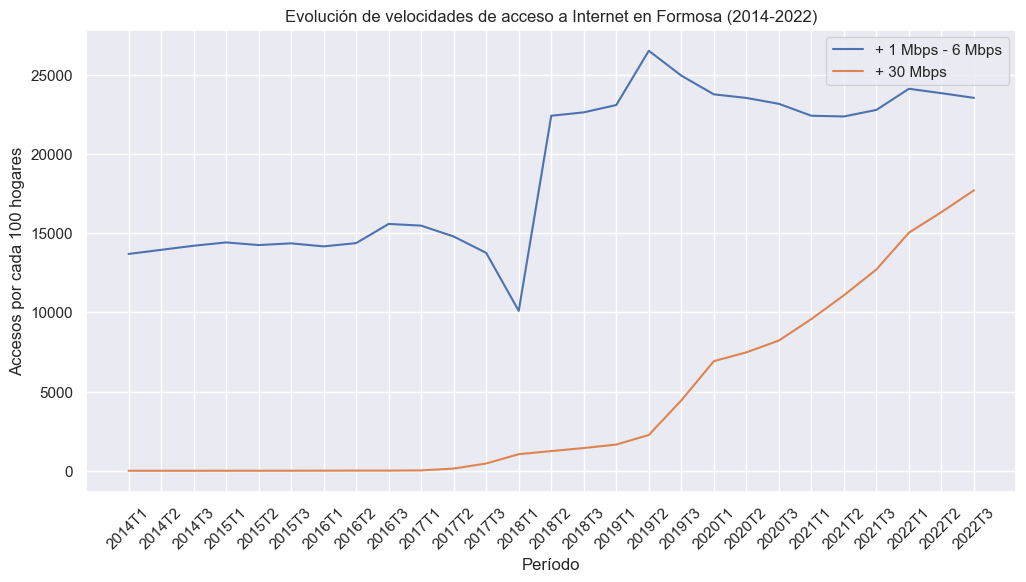

In [85]:
# Filtrar los datos para el rango de trimestres deseado
datos_filtrados = acceso_internet_1[(acceso_internet_1['Año'] >= 2014) & (acceso_internet_1['Año'] <= 2022) & (acceso_internet_1['Trimestre'] <= 3)]

# Filtrar los datos solo para la provincia de Formosa
datos_formosa = datos_filtrados[datos_filtrados['Provincia'] == 'Formosa']

# Combinar las columnas 'Año' y 'Trimestre' en una columna 'Período'
datos_formosa['Período'] = datos_formosa['Año'].astype(str) + 'T' + datos_formosa['Trimestre'].astype(str)

# Agrupar los datos por velocidad y calcular la media de accesos por cada 100 hogares para cada velocidad en cada trimestre
velocidades = ['+ 1 Mbps - 6 Mbps','+ 30 Mbps']

datos_por_velocidad = datos_formosa.groupby(['Período'])[velocidades].mean().reset_index()

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de línea utilizando Seaborn
plt.figure(figsize=(12, 6))
for velocidad in velocidades:
    sns.lineplot(data=datos_por_velocidad, x='Período', y=velocidad, label=velocidad)

plt.xlabel('Período')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución de velocidades de acceso a Internet en Formosa (2014-2022)')
plt.legend()
plt.xticks(rotation=45)

plt.show()



En este caso tomé la velocidad de conexión que predomina en el en la provincia '+ 1 Mbps - 6 Mbps' en comparación la de '+30 Mbps' que es la vista al futuro. 
A pesar de que en Formosa la conexión '+30 Mbps' tiene un porcentaje muy bajo con respecto a las otras provincias con mayor infraestrucura como por ejemplo 'Capital Federal', a partir del segundo trimestre del 2019 va en aumento. Lo que quiere decir que se está invirtiendo en insfraestructura para cubrir la demanda de los usuarios. 

# Tecnologías de acceso en Argentina

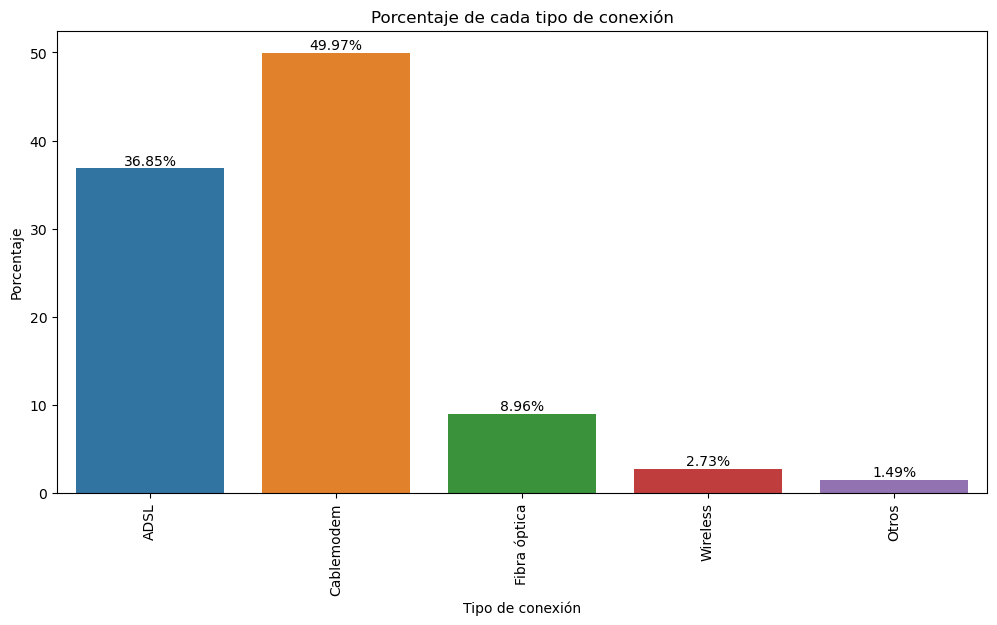

In [9]:
# Calcular el total de cada columna
columnas_velocidades = ['ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros']
total_por_columna = acceso_internet_2[columnas_velocidades].sum()

# Calcular los porcentajes
porcentajes = (total_por_columna / total_por_columna.sum()) * 100

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=porcentajes.index, y=porcentajes.values)
plt.xlabel('Tipo de conexión')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de cada tipo de conexión')
plt.xticks(rotation=90)


# Agregar los valores en porcentaje dentro del gráfico
for i, v in enumerate(porcentajes):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()


En téminos del tipo de conexión podemos observar que el Cablemodem con un 49.97% del total por tecnología de acceso y podemos afirmar que se establece como la tecnología mas importante y con mayor proyección hasta el 20222, seguido de  la tecnología ADSL con un 36.85%, seguido la Fibra Óptica con 8.96%, la tecnología Wreless con el 2.73% y Otros con el 1.49%.

# Evolución en el tiempo de los tipos de tecnologías de conexión

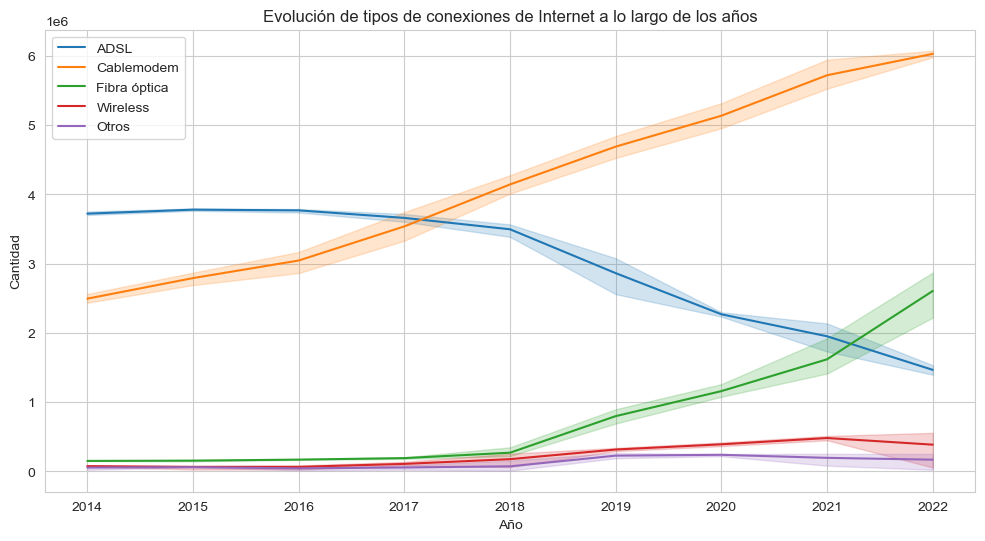

In [10]:
# Filtrar las columnas relevantes
columnas_conexiones = ['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
datos_conexiones = acceso_internet_2[columnas_conexiones]

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=datos_conexiones, x='Año', y='ADSL', label='ADSL')
sns.lineplot(data=datos_conexiones, x='Año', y='Cablemodem', label='Cablemodem')
sns.lineplot(data=datos_conexiones, x='Año', y='Fibra óptica', label='Fibra óptica')
sns.lineplot(data=datos_conexiones, x='Año', y='Wireless', label='Wireless')
sns.lineplot(data=datos_conexiones, x='Año', y='Otros', label='Otros')

# Configurar los ejes y el título
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Evolución de tipos de conexiones de Internet a lo largo de los años')

# Mostrar el gráfico
plt.legend()
plt.show()


Con este gráfico vemos que, a pesar de que 'Cablemódem' se sobrepone de forma ascendente con respecto a las otras conexiones, la conexión de Fibra óptica ha tenido un impulso ascendente imortante a partir del año 2018. Podemos concluir que hubo un mayor desarrollo de infraestructura, así como despliegue de redes de fibra óptica para soportar el ancho de banda que se demanda en la actualidad.

#### 

In [19]:
accesos_por_periodo.to_csv('acceso_por_periodo_1.csv', index= False)